In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanacse","key":"dd8258ac3cfced50e9860b05c4d73757"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented
!unzip alzheimers-multiclass-dataset-equal-and-augmented.zip

Streaming output truncated to the last 5000 lines.
  inflating: combined_images/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: combined_images/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: combined_images/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: combined_images/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: combined_images/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: combined_images/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: combined_images/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: combined_images/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: combined_images/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: combined_images/VeryMildDemented/a293bcd0-b371-4120-a3b5-f8c763b0fa95.jpg  
  inflating: combined_images/VeryMildDemented/a296a0bd-4784

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#creating training data with the above parameters and applying transformation
# folder = parameters.flow_from_directory(path,ts,bs,cm,subset)

train_generator = train_datagen.flow_from_directory(
     '/content/combined_images',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

Found 35200 images belonging to 4 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
     '/content/combined_images',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation',
)

Found 8800 images belonging to 4 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(4,activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_indices = train_generator.class_indices
class_name = list(class_indices.keys())
print(class_indices)
print(class_name)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,epochs = 10, validation_data = val_generator, batch_size = BATCH_SIZE,)

Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 71s 63ms/step - accuracy: 0.6332 - loss: 0.8284 - val_accuracy: 0.8493 - val_loss: 0.3583
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 69s 63ms/step - accuracy: 0.8990 - loss: 0.2545 - val_accuracy: 0.9018 - val_loss: 0.2531
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 69s 63ms/step - accuracy: 0.9509 - loss: 0.1281 - val_accuracy: 0.9094 - val_loss: 0.2344
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9701 - loss: 0.0829 - val_accuracy: 0.9090 - val_loss: 0.2719
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.9851 - loss: 0.0437 - val_accuracy: 0.9082 - val_loss: 0.2864
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9874 - loss: 0.0382 - val_accuracy: 0.9044 - val_loss: 0.3584
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 68s 62ms/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.9192 - val_loss: 0.3511
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 69s 63ms/step - accuracy: 0.9919 -

In [ ]:
model.save('/content/combined_images/multiclass.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/combined_images/multiclass.h5')
print('model loaded')

model loaded


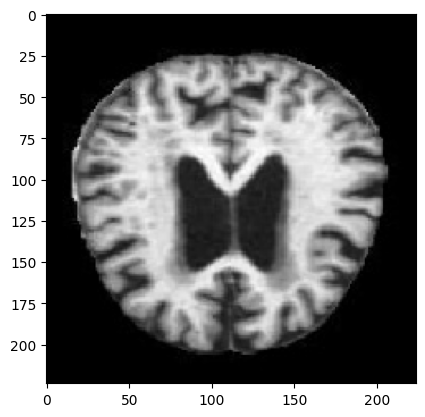

In [ ]:
test_image_path = "/content/img1.png"
img = image.load_img(test_image_path,target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis = 0)
img_array /= 255.

In [ ]:
prediction = model.predict(img_array)
print(prediction)
nd = np.argmax(prediction[0])
print(class_name[nd])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
[[1.0000000e+00 5.0814628e-22 5.6319335e-11 2.2981476e-08]]
MildDemented
